In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [2]:
df= {'A':[1,2,np.nan], 'B': [3,np.nan,np.nan]}
df= pd.DataFrame(df)
df

,A,B
0,1.0,3.0
1,2.0,NaN
2,NaN,NaN


In [3]:
df.isnull()

,A,B
0,False,False
1,False,True
2,True,True


In [4]:
df.isnull().sum()

A    1
B    2
dtype: int64

In [5]:
# df.dropna() <----drops all missing values
# df.dropna(axis=1) <------ drops columns that have any missing values
#df.dropna(thresh=2) <----- drops a row if it has 2+ values present
#below - imputing values
#df.fillna(value="new value") <---------- df['column_name'].fillna(value="new value") <----- applies to a specific column

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')
df.shape

(397, 7)

In [7]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [8]:
df.isnull().sum()

Unnamed: 0       0
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [9]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


In [10]:
df.columns

Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')

In [11]:
df = df.rename(columns={'Unnamed: 0':'Unique Key', 'yrs.service': 'Tenure'})
df

,Unique Key,rank,discipline,yrs.since.phd,Tenure,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


In [23]:
df.groupby(['rank'])['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
rank,,,,,,,,
AssocProf,64.0,93876.437500,13831.699844,62884.0,82475.00,95626.5,104226.25,126431.0
AsstProf,67.0,80775.985075,8174.112637,63100.0,74000.00,79800.0,88597.50,97032.0
Prof,266.0,126772.109023,27718.674999,57800.0,105975.25,123321.5,145080.50,231545.0


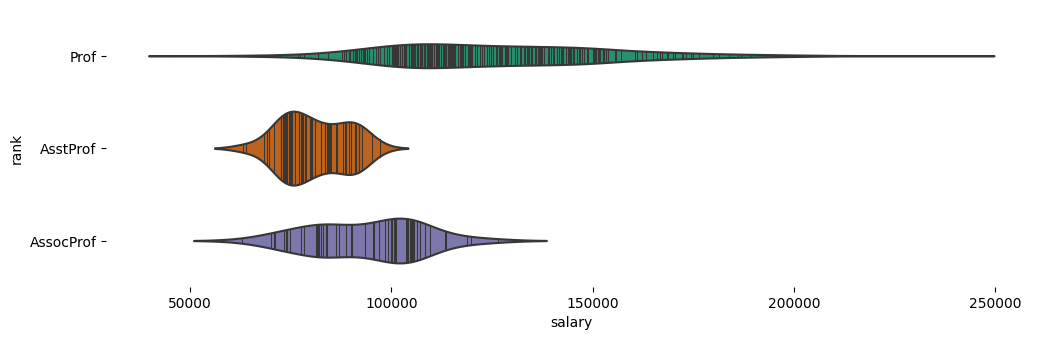

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['rank'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='salary', y='rank', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

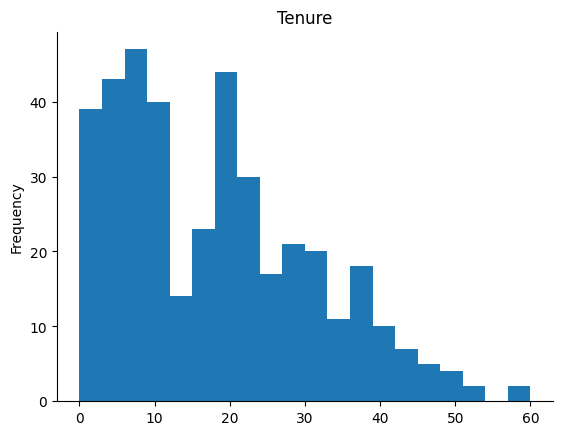

In [13]:
from matplotlib import pyplot as plt
df['Tenure'].plot(kind='hist', bins=20, title='Tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

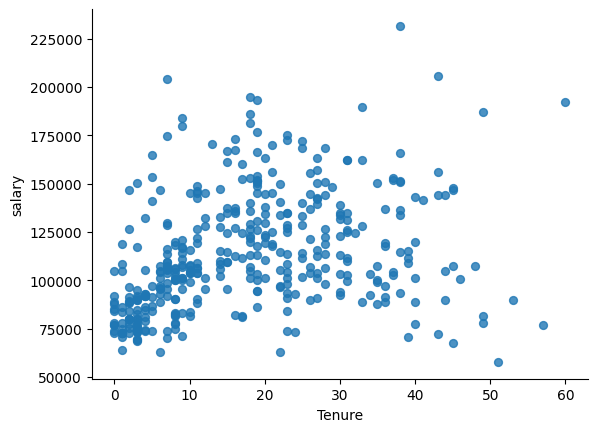

In [14]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Tenure', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

stronger correlation between salary and tenure for earlier career professionals. Wider variety as careers progress.

In [22]:
df.groupby(['sex'])['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,39.0,101002.410256,25952.127317,62884.0,77250.0,103750.0,117002.50,161101.0
Male,358.0,115090.418994,30436.927344,57800.0,92000.0,108043.0,134863.75,231545.0


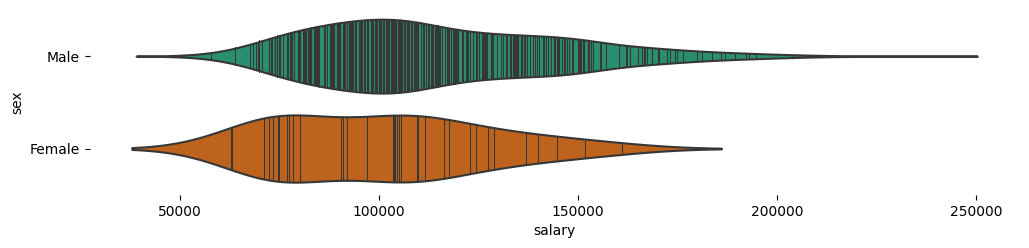

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='salary', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Womens' salaries are clustered more tightly and around a lower amount then Men's salaries. Long right tail for male salaries.